<a href="https://colab.research.google.com/github/johanhoffman/DD2363_VT21/blob/YinengWang/Lab_5/Lab5_YinengWang.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab 5: Integration**
**Yineng Wang**

# **Abstract**

This report includes the implementation and test for

1. 2-point Gauss quadrature over a unit interval
2. 3-point edge midpoint quadrature over a reference triangle
3. Monte Carlo quadrature over a unit interval
4. Monte Carlo quadrature over a reference triangle

#**About the code**

This report is written by Yineng Wang, based on Johan Hoffman's template.

In [1]:
"""This program is a template for lab reports in the course"""
"""DD2363 Methods in Scientific Computing, """
"""KTH Royal Institute of Technology, Stockholm, Sweden."""

# Copyright (C) 2020 Johan Hoffman (jhoffman@kth.se)

# This file is part of the course DD2365 Advanced Computation in Fluid Mechanics
# KTH Royal Institute of Technology, Stockholm, Sweden
#
# This is free software: you can redistribute it and/or modify
# it under the terms of the GNU Lesser General Public License as published by
# the Free Software Foundation, either version 3 of the License, or
# (at your option) any later version.

# This template is maintained by Johan Hoffman
# Please report problems to jhoffman@kth.se

'KTH Royal Institute of Technology, Stockholm, Sweden.'

# **Set up environment**

In [2]:
import random
import unittest

import numpy as np
from matplotlib import pyplot as plt


random.seed(2021)

# **Introduction**

The quadrature rule is a way to the approximate numerical integration of $f(x)$ by the equation
$$
\int_D f(x) \,dx = \sum_{i=0}^{n} f(x_i) w_i,
$$
with $n$ quadrature points and $n$ quadrature weights.

The Gauss quadrature allows using $q+1$ quadrature points to exaclty compute the integration of polynomials of degree up to $2q+1$ in 1D space, while the Monte Carlo quadrature is based on random sampling and its convergence is guarenteed by the law of large numbers.

# **Method**

## 1. 2-point Gauss quadrature over a unit interval

Input: function f(x)

Output: quadrature approximation of integral int_0^1 f(x) dx

According to example (11.3) in the lecture notes, the 2-point Gauss rule on the interval $[-1,1]$ is given by
$$
\int_{-1}^{1} p(x) \,dx = p(-1/\sqrt{3}) + p(1/\sqrt{3}), \quad p \in \mathcal{P}^3([-1,1]).
$$

By using the coordinate map $F: [-1, 1] \rightarrow [0, 1]$, $x = F(\hat{x}) = 1/2 \hat{x} + 1/2, \hat{x} \in [-1,1]$, we have
$$
\begin{align*}
\int_{0}^{1} p(x) \,dx
&= \int_{-1}^{1} p(F(\hat{x})) |F'(\hat{x})| \,d\hat{x} \\
&= \frac{1}{2} \int_{-1}^{1} p(F(\hat{x})) \,d\hat{x} \\
&= \frac{1}{2} p(F(-1/\sqrt{3})) + \frac{1}{2} p(F(1/\sqrt{3})) \\
&= \frac{1}{2} p\left(\frac{\sqrt{3}-1}{2\sqrt{3}}\right) + \frac{1}{2} p\left(\frac{\sqrt{3}+1}{2\sqrt{3}}\right).
\end{align*}
$$

Hence, the 2-point Gauss rule for the unit interval $[0, 1]$ is given by $x_0 = \frac{\sqrt{3}-1}{2\sqrt{3}}$, $x_1 = \frac{\sqrt{3}+1}{2\sqrt{3}}$, $w_0 = w_1 = 1/2$.

In [3]:
def gauss_quad_2_point_0_1(f):
    sqrt_3 = 3**0.5
    return (f((sqrt_3-1) / (2*sqrt_3)) + f((sqrt_3+1) / (2*sqrt_3))) / 2

## 2. 3-point edge midpoint quadrature over a reference triangle

Input: function f(x) 

Output: quadrature approximation of integral int_ref-triangle f(x) dx

We choose a set of basis functions $\{\phi_j\}_{j=0}^{5}$ for the space of polynomials $p: R^2 \rightarrow R$ of degree 2:

$$
\phi_0(v) = 1, \phi_1(v) = x, \phi_2(v) = y, \phi_3(v) = x^2, \phi_4(v) = y^2, \phi_5(v) = xy, \quad v = (x,y) \in R^2.
$$

By equation (11.4), the quadrature points and weights are determined from
$$
\begin{align*}
w_0 + w_1 + w_2 = \int_0^1 \,dx \int_0^{1-x} \,dy = 1/2, &\\
x_0 w_0 + x_1 w_1 + x_2 w_2 = \int_0^1 \,dx \int_0^{1-x} \,dy\,x = 1/6, &\\
y_0 w_0 + y_1 w_1 + y_2 w_2 = \int_0^1 \,dy \int_0^{1-y} \,dx\,y = 1/6, &\\
x_0^2 w_0 + x_1^2 w_1 + x_2^2 w_2 = \int_0^1 \,dx \int_0^{1-x} \,dy\,x^2 = 1/12, &\\
y_0^2 w_0 + y_1^2 w_1 + y_2^2 w_2 = \int_0^1 \,dy \int_0^{1-y} \,dx\,y^2 = 1/12, &\\
x_0 y_0 w_0 + x_1 y_1 w_1 + x_2 y_2 w_2 = \int_0^1 \,dy \int_0^{1-y} \,dx\,xy = 1/24, &
\end{align*}
$$
with $v_0 = (0, 1/2), v_1 = (1/2, 0), v_2 = (1/2, 1/2)$ and $w_0 = w_1 = w_2 = 1/6$. (In fact, we can find another solution with $v_0 = (2/3,1/6), v_1 = (1/6,2/3), v_2 = (1/6,1/6)$ and $w_0 = w_1 = w_2 = 1/6$.)

In [4]:
def gauss_quad_3_point_ref_triangle(f):
    # return (f(2/3,1/6) + f(1/6,2/3) + f(1/6,1/6)) / 6    # This solution also works
    return (f(0,1/2) + f(1/2,0) + f(1/2,1/2)) / 6

## 3. Monte Carlo quadrature over a unit interval

Input: function f(x)

Output: MC quadrature approximation of integral int_0^1 f(x) dx

The Monte Carlo quadrature rule on the interval $[0,1]$ is based on random sampling of quadrature points $x_i$ from the uniform distribution $U(0,1)$,
$$
\int_0^1 g(x) \,dx \approx \frac{1}{n} \sum_{i=1}^n g(x_i).
$$

In [5]:
def mc_quad_0_1(f, n=100):
    return sum(f(random.random()) for _ in range(n)) / n

## 4. Monte Carlo quadrature over a reference triangle

Input: function f(x)

Output: MC quadrature approximation of integral int_ref-triangle f(x) dx

The Monte Carlo quadrature rule on the reference triangle is based on random sampling of quadrature points $x_i$ from the uniform distribution on the reference triangle,

$$
\int_D g(x) \,dx \approx \frac{1}{n} \sum_{i=1}^n g(x_i) |D| = \frac{1}{2n} \sum_{i=1}^n g(x_i).
$$

We can independently and uniformly sample $x$ and $y$ between $[0, 1]$ and use rejection sampling to guarentee $(x, y)$ is in the reference triangle, but this leaves nearly half of the sampling nodes discarded. Instead, we can sample $x$ and $y$ as mentioned, but if the sampling node $(x, y)$ is outside the reference triangle, we just use the its reflection with respect to the straight line $y = 1 - x$, $(1-y, 1-x)$, as the sampling node. As nodes are evenly distributed between the reference triangle and its reflection, the result is statistically the same.

In [6]:
def mc_quad_ref_triangle(f, n=100):
    def sample():
        x, y = random.random(), random.random()
        if x + y > 1:
            return 1 - y, 1 - x    # return its reflection w.r.t. y = 1 - x
        else:
            return x, y
    return sum(f(*sample()) for _ in range(n)) / n / 2

# **Results**

## 1. 2-point Gauss quadrature over a unit interval

Test: verify exact integration of cubic polynomials ax^3 + bx^2 + cx + d.

The basic cases for cubic, quadratic, linear and constant functions are included. Randomized test is used to cover more cases fastly.

The exact integration is derived from the equations
$$
\int_0^1 x^3\,dx = 1/4, \\
\int_0^1 x^2\,dx = 1/3, \\
\int_0^1 x\,dx = 1/2, \\
\int_0^1 1\,dx = 1.
$$

In [7]:
class TestGaussQuad2Point01(unittest.TestCase):
    @staticmethod
    def exact_cubic_polynomial_integral_over_0_1 (a, b, c, d):
        return a/4 + b/3 + c/2 + d

    def basic_test(self, a, b, c, d):
        int_1 = gauss_quad_2_point_0_1(lambda x: a*x**3 + b*x**2 + c*x + d)
        int_2 = self.exact_cubic_polynomial_integral_over_0_1(a, b, c, d)
        self.assertAlmostEqual(int_1, int_2)

    def test_exact_integration(self):
        self.basic_test(1, 1, 1, 1)    # cubic
        self.basic_test(0, 1, 1, 1)    # quadratic
        self.basic_test(0, 0, 1, 1)    # linear
        self.basic_test(0, 0, 0, 1)    # constant
        # run 100 times randomly
        for _ in range(100):
            a, b, c, d = [random.uniform(-1000, 1000) for _ in range(4)]
            self.basic_test(a, b, c, d)

## 2. 3-point edge midpoint quadrature over a reference triangle

Test: verify exact integration of quadratic polynomials ax^2 + by^2 + cxy + dx + ey + f.

The basic cases for polynomials of degree up to 2 over a reference triangle are included. Randomized test is used to cover more cases fastly.

The exact integration is derived from the equations
$$
\iint_D x^2 \,dx\,dy = \iint_D y^2 \,dx\,dy = 1/12, \\
\iint_D xy\,dx\,dy = 1/24, \\
\iint_D x\,dx\,dy = \iint_D y\,dx\,dy = 1/6, \\
\iint_D 1\,dx\,dy = 1/2.
$$

In [8]:
class TestGaussQuad3PointRefTriangle(unittest.TestCase):
    @staticmethod
    def exact_polynomial_integral_over_ref_triangle(a, b, c, d, e, f):
        return a/12 + b/12 + c/24 + d/6 + e/6 + f/2

    def basic_test(self, a, b, c, d, e, f):
        int_1 = gauss_quad_3_point_ref_triangle(lambda x, y: a*x*x + b*y*y + c*x*y + d*x + e*y + f)
        int_2 = self.exact_polynomial_integral_over_ref_triangle(a, b, c, d, e, f)
        self.assertAlmostEqual(int_1, int_2)

    def test_exact_integration(self):
        self.basic_test(1, 1, 1, 1, 1, 1)    # quadratic case 1
        self.basic_test(0, 0, 1, 1, 1, 1)    # quadratic case 2
        self.basic_test(1, 1, 0, 1, 1, 1)    # quadratic case 3
        self.basic_test(0, 0, 0, 1, 1, 1)    # linear
        self.basic_test(0, 0, 0, 0, 0, 1)    # constant
        # run 100 times
        for _ in range(100):
            a, b, c, d, e, f = [random.uniform(-1000, 1000) for _ in range(6)]
            self.basic_test(a, b, c, d, e, f)

## 3. Monte Carlo quadrature over a unit interval

Test: verify convergence rate 1/sqrt(n) with respect to number of quadrature points n.

We use the trigonometric function $f(x) = \sin(\pi x / 2)$ to verify the convergence. If the curve of $1/\mathrm{err}^2$-$n$ remains almost linear, the convergence rate is approximately $1/\sqrt{n}$.

In [9]:
def test_mc_quad_0_1_convergence():
    N_TRIALS = 100
    exact_integral = 2 / np.pi
    f = lambda x: np.sin(np.pi * x / 2)
    n_samples = np.array([10, 20, 30, 40, 50, 100, 250, 500, 1000, 2500, 5000])
    err = np.zeros(len(n_samples))
    for trial in range(N_TRIALS):
        approx = np.array([mc_quad_0_1(f, i) for i in n_samples])
        err += np.abs(approx - exact_integral)
    err /= N_TRIALS

    plt.plot(n_samples, 1/err**2)
    plt.title("Monte Carlo quadrature over a unit interval")
    plt.xlabel("Number of samples n")
    plt.ylabel("Inversed square of absolute error")
    plt.show()

## 4. Monte Carlo quadrature over a reference triangle

Test: verify convergence rate 1/sqrt(n) with respect to number of quadrature points n.

We use the function $f(x, y) = e^{-x-y}$ to verify the convergence. If the curve of $1/\mathrm{err}^2$-$n$ remains almost linear, the convergence rate is approximately $1/\sqrt{n}$.

In [10]:
def test_mc_quad_ref_triangle_convergence():
    N_TRIALS = 100
    exact_integral = 1 - 2 * np.exp(-1)
    f = lambda x, y: np.exp(-x - y)
    n_samples = np.array([10, 20, 30, 40, 50, 100, 250, 500, 1000, 2500, 5000])
    err = np.zeros(len(n_samples))
    for trial in range(N_TRIALS):
        approx = np.array([mc_quad_ref_triangle(f, i) for i in n_samples])
        err += np.abs(approx - exact_integral)
    err /= N_TRIALS

    plt.plot(n_samples, 1/err**2)
    plt.title("Monte Carlo quadrature over a reference triangle")
    plt.xlabel("Number of samples n")
    plt.ylabel("Inversed square of absolute error")
    plt.show()

## Conduct the test

test_exact_integration (__main__.TestGaussQuad2Point01) ... ok
test_exact_integration (__main__.TestGaussQuad3PointRefTriangle) ... ok

----------------------------------------------------------------------
Ran 2 tests in 0.006s

OK


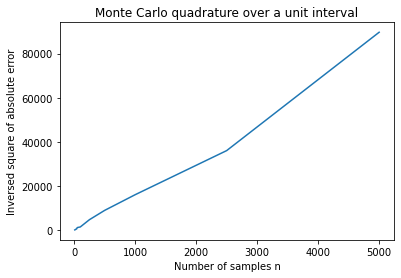

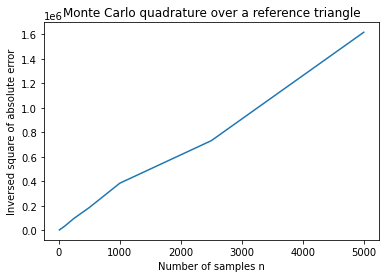

In [11]:
if __name__ == '__main__':
    unittest.main(argv=[''], exit=False, verbosity=2)
    test_mc_quad_0_1_convergence()
    test_mc_quad_ref_triangle_convergence()

# **Discussion**

As the graph shows, the curve of $1/\mathrm{err}^2$-$n$ remains almost linear. This verifies the convergence rate $1/\sqrt{n}$ with respect to number of quadrature points $n$.

For the Gauss quadrature method, the implementation shows the exactness of the integration for polynomials under a certain degree.